# Wstęp do sztucznej inteligencji - sprawozdanie z zadania 1
#### Maksym Bieńkowski

In [9]:
from src.problem import Problem
from src.solver import GradientSolver
from src.constants import *
from src.Plotter import Plotter
import numpy as np
from random import randint
import matplotlib

f_problem = Problem(1, f, gradient_f)
g_problem = Problem(2, g, gradient_g)

## Funkcja $f(x) = \frac{1}{4}x^4$ o pochodnej $x^3$
### Wykres funkcji

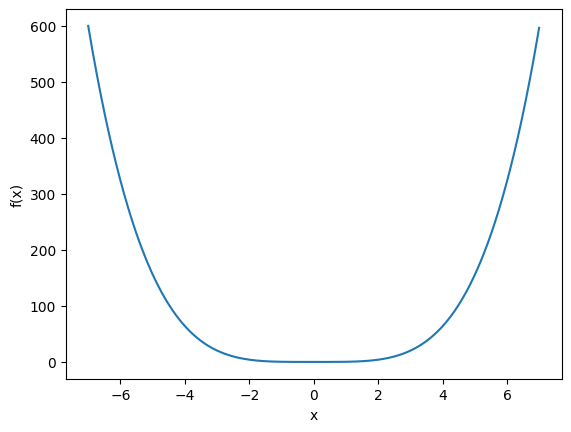

In [10]:
solver = GradientSolver(debug=False, plot="no_solution")
solver.solve(f_problem, 0);

Funkcja ta posiada jedno minimum w punkcie x = 0. Jak się jednak okazuje, należy naprawdę uważnie dobrać betę w zależności od punktu startowego, aby nie dopuścić do "rozhuśtania" się kulki, co ma miejsce dla kombinacji zbyt dużej wartości bety i punktu startowego o wysokiej wartości bezwzględnej. W takim wypadku wartość gradientu funkcji rośnie wykładniczo co iterację ze względu na trzecią potęgę we wzorze pochodnej i już po kilku iteracjach program obrzuca nas błędami związanymi z overflowem. Z drugiej strony, gdy nie dopuścimy do tego i algorytm dojdzie do x, dla którego $|x| < 1$, z każdym krokiem stronę zera wartość gradientu wykładniczo maleje. W związku z tym, znalezione miejsca zerowe bywają całkiem nieprecyzyjne dla $\epsilon$ rzędu 1e-4. Oto działanie algorytmu przy parametrach, które na podstawie moich prób okazały się dość skuteczne:


In [11]:
solver = GradientSolver(debug=True, plot=None, beta=0.01, epsilon=0.00001, max_iterations=20000)

starting_points = [randint(-300, 300) / 100 for i in range(5)]
for point in starting_points:
    solver.solve(f_problem, point)


For the starting point -2.8, the algorithm has exceeded the maximum number of iterations! (20000) at the point [-0.05].
For the starting point 2.43, the algorithm has exceeded the maximum number of iterations! (20000) at the point [0.05].
For the starting point -2.47, the algorithm has exceeded the maximum number of iterations! (20000) at the point [-0.05].
For the starting point -1.74, the algorithm has exceeded the maximum number of iterations! (20000) at the point [-0.05].
For the starting point -0.19, the algorithm has exceeded the maximum number of iterations! (20000) at the point [-0.048].


Możemy zauważyć tu interesującą zbieżność wyników działania algorytmu dla wszystkich startowych punktów - związane to jest ze wspomnianym wcześniej zjawiskiem zmniejszającej się wykładniczo wartości gradientu dla liczb o wartości bezwzględnej poniżej 1. 0.05 to jednak moim zdaniem nienajgorszy wynik, za który jeszcze nie przepłacamy długim czasem wykonania programu (powyżej 30000 iteracji potrzebował on już chwili na zwrócenie wyniku).


### Zbyt wysoka wartość bety

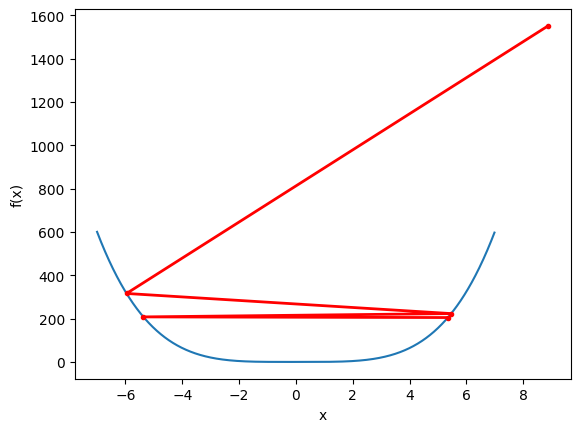

In [12]:
solver = GradientSolver(plot="path", beta=0.07, epsilon=0.001, max_iterations=4)
solver.solve(f_problem, 5.35);

Powyższa kalkulacja minimum musiała zostać zatrzymana już po 4 iteracjach ze względu na wykładniczy wzrost wartości. Zbyt duża wartość bety prowadzi do wykonania kroku wielkości $d > 2 * |x_0|$, w związku z czym w kolejnych iteracjach schemat ten powtarza się coraz szybciej. Podsumowując, w wypadku zadanej funkcji f algorytm zadziała wyłącznie dla zakresu początkowego $<-x_0, x_0>$, dla którego mamy pewność, że $2x_0 < x^3\beta$.

## Funkcja g(x1, x2) = $\frac3{2} - e^{-x_1^2-x_2^2} - \frac1{2} e^{-(x_1-1)^2-(x_2+2)^2}$

### Wykres funkcji

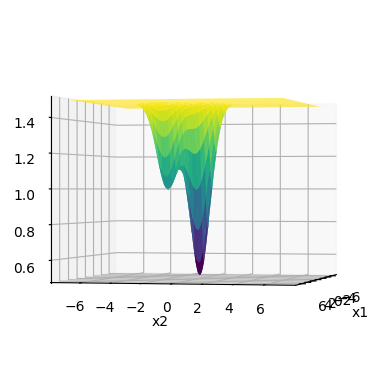

In [13]:
plotter = Plotter(g_problem, "no_solution")
plotter.initialize_plot()
plotter.ax.view_init(elev=0, azim=13)

Funkcja posiada dwa minima: lokalne o współrzędnych (1,2) i globalne (0,0). Zależnie od punktu startowego, znajdujemy jedno lub żadne z nich. Rozpatrzmy wszystkie przypadki.

### Minimum globalne (0, 0)

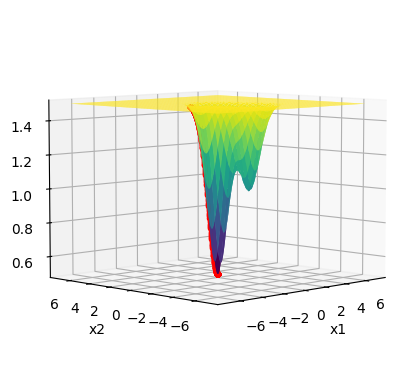

array([ 0.00300991, -0.00674778])

In [14]:
solver = GradientSolver(plot="path")
solver.solve(g_problem, np.array([-2, 0.6]))

## Minimum lokalne (1, 2)

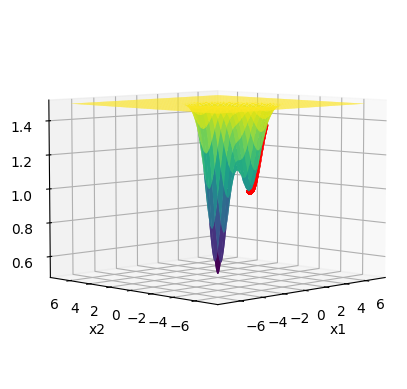

array([ 0.98490897, -1.9701073 ])

In [15]:
solver = GradientSolver(plot="path")
solver.solve(g_problem, np.array([1.2, -3.2]))

### Żadne z minimów
zadana funkcja poza wspomnianymi minimami dąży do wartości 1.5 w całym obszarze $R^2$, ponieważ wyrazy postaci $e^{h(x_1, x_2)}$ zerują się razem ze wzrostem tych wartości. W związku z tym, poza dwoma "dołkami" w dziedzinie, gradient tej funkcji jest praktycznie zerowy. Co za tym idzie, przy losowym wyborze punktu jest bardzo duża szansa na to, że algorytm nie będzie miał niezbędnej informacji, w którą stronę ruszyć i przedwcześnie zakończy działanie. Spójrzmy na wynik programu przy tak niefortunnie dobranym punkcie: 

In [16]:
solver=GradientSolver(plot=None, debug=True, epsilon=1e-6)
solver.solve(g_problem, np.array([3, 3]));

For the starting point [3 3], the algorithm has converged after 0 iterations at the point [3, 3].


Zgodnie z oczekiwaniami, algorytm nie wykonał nawet jednej iteracji, ponieważ wartość gradientu była niższa od zadanego, bardzo małego, epsilona. Warto zauważyć, że zmniejszenie go do rzędu 1e-9 sprawia, że wykonuje on wszystkie dozwolone iteracje, poruszając się o bardzo niewielki dystans. Intuicyjne wydaje się w tym wypadku zwiększenie bety lub liczby iteracji, ale nawet przy podniesieniu obu wartości o rzędy wielkości, nie odnajduje on minimum. Zachodzi jedna z dwóch sytuacji: algorytm nie robi postępu i kończy działanie w bliskim promieniu punktu startowego lub (przy bardzo dużej wartości $b$) trafia on w okolice minimum, jednak od razu z nich wyskakuje ze względu na zbyt dużą wartość $\beta$. 

## Wnioski
Z powyższych prób wynika, że algorytm gradient descent nie radzi sobie idealnie z każdą zadaną mu funkcją - w omówionych przypadkach moim zdaniem nie zdaje on zadania. Udaje mu się znaleźć minima dla bardzo konkretnie dobranych kombinacji parametrów oraz punktów startowych. Naturalnie, w praktyce tak niewielka liczba prób jest po prostu niewystarczająca i prawdopodobnie przy wypróbowaniu milionów punktów startowych wraz z różnymi wartościami $\beta$, poradziłby on sobie z zadanymi funkcjami, nawet, gdybyśmy nie mieli żadnych informacji o nich i budowie ich wykresów. Wydaje mi się też, że zmodyfikowanie algorytmu tak, aby rozmiar kroku w stronę potencjalnego rozwiązania był niewielki, lecz stały - poprzez modyfikację $\beta$ w zależności od wartości gradientu, mogłoby okazać się skuteczne w wypadku zadanych funkcji - nie mielibyśmy problemów z rosnącymi/malejącymi wykładniczo wartościami gradientu w wypadku pierwszej funkcji, a w drugiej, po znalezieniu okolicy minimum, nie przeskakiwalibyśmy go, a szli w jego stronę w stałym tempie.